First, let's import all the libraries that we need. 

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


We read the contents of our dataset.

In [177]:
trains_df = pd.read_csv("trains.csv")

**Exploratory Data Analysis (EDA)**

In this project, our goal is to understand customer satisfaction without direct evaluation. We notice that our dataset has a 'Satisfied' column given to us already for direct evaluation but instead of treating this as an ultimate evaluation of customer satisfaction, we choose to look at various features of our dataset and their relationship with customer satisfaction.

 Therefore, an ideal EDA should focus on uncovering the underlying patterns and relationships in the data that might influence customer satisfaction. Our goal here is to identify key factors that contribute to a positive or negative travel experience, the information to which is made readily available to us in the form of ratings.

We first take a brief look at columns and first entries of our dataset.

In [178]:
print(trains_df.columns)
trains_df.head(5)

Index(['Legroom Service Rating', 'Onboard General Rating',
       'Food'n'Drink Rating', 'Age', 'Departure Arrival Time Rating',
       'Onboard WiFi Rating', 'Ticket ID', 'Checkin Rating',
       'Track Location Rating', 'Baggage Handling Rating',
       'Arrival Delay in Minutes', 'Ticket Class', 'Loyalty', 'Gender',
       'Boarding Rating', 'Online Booking Rating', 'Satisfied',
       'Onboard Entertainment Rating', 'Date and Time', 'Distance',
       'Seat Comfort Rating', 'Work or Leisure', 'Departure Delay in Minutes',
       'Onboard Service Rating', 'Cleanliness Rating'],
      dtype='object')


,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


This is great information, but we must keep our main purpose in mind so that our analyses can be tailored to consider only the relevant information. In this dataset, **Satisfaction** is what we are most interested in and thus, we focus on the ratings. In order to make this better to interpret, we add "Average Ratings" to the data so that we have one value to represent the customers' ratings. 

We additionally remove columns that do not have a direct impact on customer satisfaction such as 'Ticket ID', 'Date and Time' and 'Work or Leisure'. Although these factors could be analysed further as 'Do certain times of the year serve better than others?' but we choose to make a generalisation in this study for the sake of simplification and keeping are goal fixated on the bigger picture of mere customer satisfaction.'

In [179]:
trains_df['Average_Rating'] = trains_df[['Onboard General Rating', 'Baggage Handling Rating', 'Cleanliness Rating', "Food'n'Drink Rating", 'Online Booking Rating', 'Onboard Service Rating', 'Legroom Service Rating', 'Checkin Rating', 'Onboard Entertainment Rating', 'Boarding Rating', 'Onboard WiFi Rating', 'Seat Comfort Rating', 'Track Location Rating', 'Departure Arrival Time Rating']].mean(axis=1)
columns_to_remove = [
    'Ticket ID', 'Date and Time'
]
trains_df = trains_df.drop(columns=columns_to_remove)

Now, we deal with handling the categorical variables. Although the 'Satisfied' column is our primary determinant, we notice that it has 'Y' and 'N' as its binary values. We represent 'Y' as 1 and 'N' as 0 to make these values more interpretable. We do the same for Loyalty as we treat 'Disloyal' as 0 and 'Loyal' as 1. Ticket classifies 'Economy' class as 1, 'Smart' as 2 and 'Premium' as 3. For Gender we use 1 to denote 'F' and 0 to denote 'M'. Finally, we denout 'work' by 1 and 'leisure' as 0.

We also replace Nulls in Arrival Delay in Minutes as 0 (meaning no delay)

In [180]:
trains_df['Satisfied'] = trains_df['Satisfied'].apply(lambda x: 1 if x == 'Y' else 0)
trains_df['Loyalty'] = trains_df['Loyalty'].apply(lambda x: 1 if x == 'Loyal' else 0)
trains_df['Ticket Class'] = trains_df['Ticket Class'].apply(lambda x: 1 if x == 'Economy' else (2 if x == 'Smart' else 3))
trains_df['Gender'] = trains_df['Gender'].apply(lambda x: 0 if x == 'M' else 1)
trains_df['Work or Leisure'] = trains_df['Work or Leisure'].apply(lambda x: 1 if x == 'work' else 0)


trains_df['Arrival Delay in Minutes'] = trains_df['Arrival Delay in Minutes'].fillna(0)

In [181]:
print("Column Names:", trains_df.columns)
print("Shape of DataFrame:", trains_df.shape)
print("Data Types:\n", trains_df.dtypes)
print("Missing Values:\n", trains_df.isnull().sum())


Column Names: Index(['Legroom Service Rating', 'Onboard General Rating',
       'Food'n'Drink Rating', 'Age', 'Departure Arrival Time Rating',
       'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating',
       'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Ticket Class',
       'Loyalty', 'Gender', 'Boarding Rating', 'Online Booking Rating',
       'Satisfied', 'Onboard Entertainment Rating', 'Distance',
       'Seat Comfort Rating', 'Work or Leisure', 'Departure Delay in Minutes',
       'Onboard Service Rating', 'Cleanliness Rating', 'Average_Rating'],
      dtype='object')
Shape of DataFrame: (129880, 24)
Data Types:
 Legroom Service Rating             int64
Onboard General Rating             int64
Food'n'Drink Rating                int64
Age                                int64
Departure Arrival Time Rating      int64
Onboard WiFi Rating                int64
Checkin Rating                     int64
Track Location Rating              int64
Baggage Handling Rati

**Statistical Summary**

We disect the variables into two groups: Categorical Variables (Nominal and Ordinal) and Continuous Variables.

In [182]:
categv=['Gender', 'Work or Leisure', 'Ticket Class', 'Loyalty']
continuous_variables = ['Legroom Service Rating', 'Onboard General Rating', 'Food\'n\'Drink Rating', 
                        'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Checkin Rating', 
                        'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 
                        'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 
                        'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating', 'Average_Rating']

categorical_df = trains_df[categv]
continuous_df = trains_df[continuous_variables]

In [183]:
categorical_df

,Gender,Work or Leisure,Ticket Class,Loyalty
0,0,0,2,1
1,0,1,3,0
2,1,1,3,1
3,1,1,3,1
4,0,1,3,1
...,...,...,...,...
129875,0,1,3,0
129876,0,1,3,1
129877,1,0,1,1
129878,0,1,3,1


In [184]:
continuous_df

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating,Average_Rating
0,3,5,5,13,4,3,4,1,4,18.0,3,3,5,460,5,25,4,5,3.857143
1,5,4,1,25,2,3,1,3,3,6.0,3,3,1,235,1,1,1,1,2.285714
2,3,4,5,26,2,2,4,2,4,0.0,5,2,5,1142,5,0,4,5,3.714286
3,5,4,2,25,5,2,1,5,3,9.0,2,5,2,562,2,11,2,2,3.000000
4,4,3,4,61,3,3,3,3,4,0.0,5,3,3,214,5,0,3,3,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,2,5,4,34,3,3,4,1,4,0.0,3,3,4,526,4,0,3,4,3.357143
129876,5,5,4,23,4,4,5,4,5,0.0,4,4,4,646,4,0,4,4,4.285714
129877,3,4,2,17,5,2,5,5,4,0.0,1,1,2,828,2,0,4,2,3.000000
129878,2,5,4,14,3,3,4,3,5,0.0,4,3,4,1127,4,0,3,4,3.642857


In [185]:
categorical_df.value_counts()

Gender  Work or Leisure  Ticket Class  Loyalty
1       1                3             1          25178
0       1                3             1          25091
        0                1             1          16411
1       0                1             1          16410
        1                1             0           7261
0       1                1             0           6189
                                       1           5947
1       1                1             1           5907
                         3             0           4762
0       1                3             0           4456
1       0                2             1           2280
0       0                2             1           2225
        1                2             1           2026
1       1                2             1           1965
0       0                3             1           1344
1       0                3             1           1316
        1                2             0            721
0

In [186]:
continuous_df.describe()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating,Average_Rating
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.350878,3.642193,3.204774,39.427957,3.057599,2.728696,3.306267,2.976925,3.632114,15.045465,3.252633,2.756876,3.358077,1190.316392,3.441361,14.713713,3.383023,3.286326,3.241267
std,1.316252,1.176669,1.329933,15.119360,1.526741,1.329340,1.266185,1.278520,1.180025,38.416353,1.350719,1.401740,1.334049,997.452477,1.319289,38.071126,1.287099,1.313682,0.661728
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.071429
25%,2.000000,3.000000,2.000000,27.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000,2.785714
50%,4.000000,4.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,4.000000,844.000000,4.000000,0.000000,4.000000,3.000000,3.285714
75%,4.000000,5.000000,4.000000,51.000000,4.000000,4.000000,4.000000,4.000000,5.000000,13.000000,4.000000,4.000000,4.000000,1744.000000,5.000000,12.000000,4.000000,4.000000,3.714286
max,5.000000,5.000000,5.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000,5.000000,5.000000,5.000000,4983.000000,5.000000,1592.000000,5.000000,5.000000,5.000000


**Visualisations**

For categorical variables, we visualise them as bar-graphs to compare them with the Satisfied column.

Choice Distribution for Gender:
 Satisfied      0      1
Gender                 
0          35822  28159
1          37630  28269


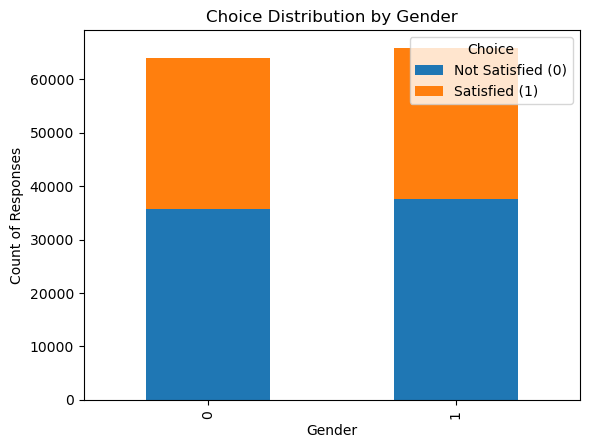

Choice Distribution for Work or Leisure:
 Satisfied            0      1
Work or Leisure              
0                36115   4072
1                37337  52356


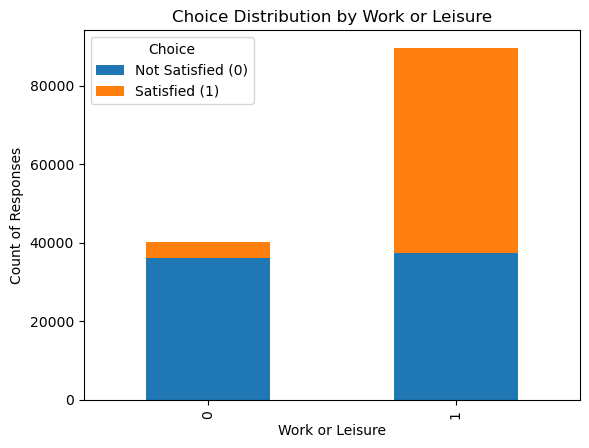

Choice Distribution for Ticket Class:
 Satisfied         0      1
Ticket Class              
1             47366  10943
2              7092   2319
3             18994  43166


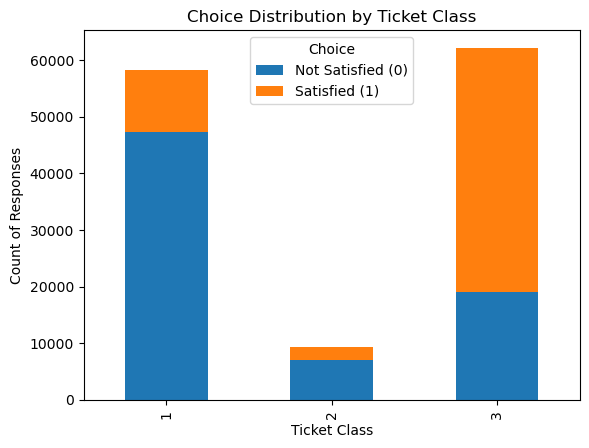

Choice Distribution for Loyalty:
 Satisfied      0      1
Loyalty                
0          18080   5700
1          55372  50728


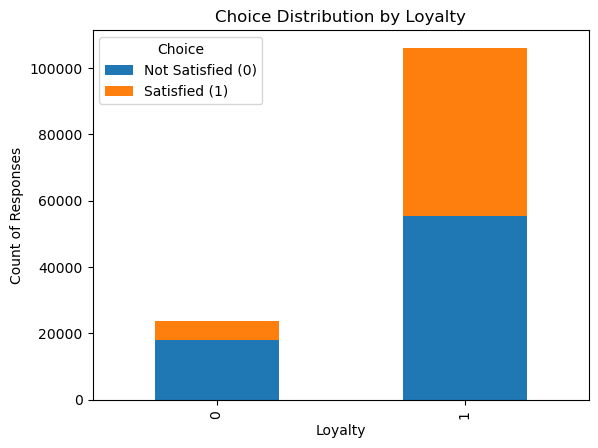

In [187]:
for column in categorical_df.columns:
    # Group by the current column and count the values of 'Satisfied'
    choice_counts = trains_df.groupby(column)['Satisfied'].value_counts().unstack()

    # Print the counts
    print(f"Choice Distribution for {column}:\n", choice_counts)

    # Plotting the counts of each choice (0 and 1) for each category in the column
    choice_counts.plot(kind='bar', stacked=True)
    plt.title(f'Choice Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count of Responses')
    plt.legend(title='Choice', labels=['Not Satisfied (0)', 'Satisfied (1)'])
    plt.show()

Let's now deal with continuous variables.

**Unvariate Analysis**

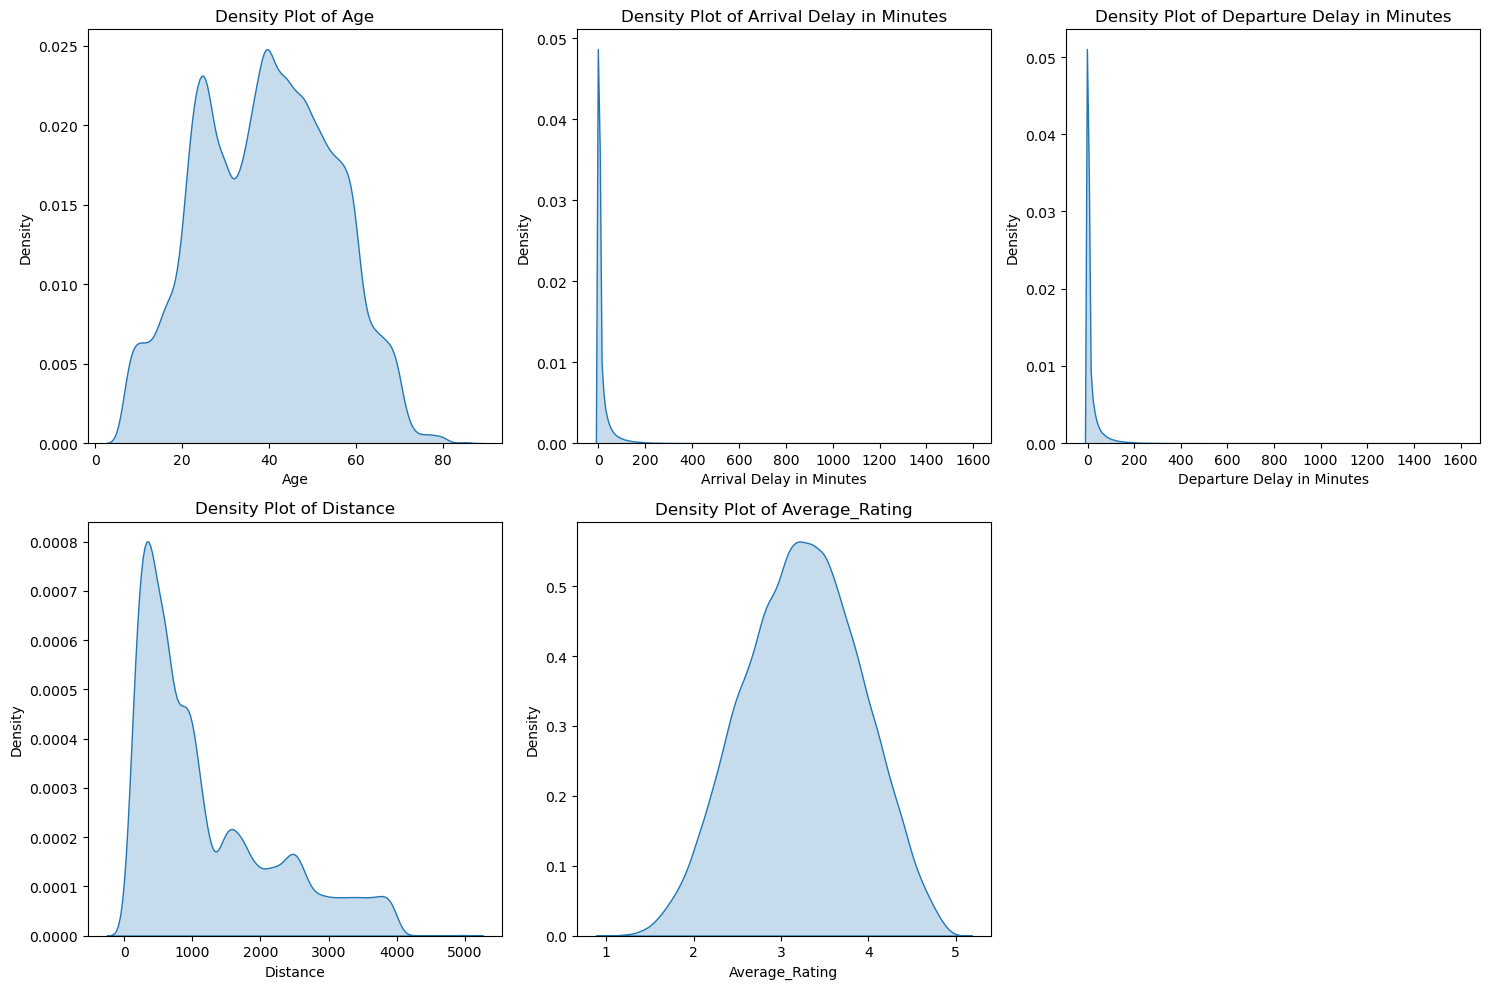

In [188]:
continuous_variables = ['Age', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Distance', 'Average_Rating']

# Generating density plots for each continuous variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 3, i)  # Adjust the grid dimensions as needed
    sns.kdeplot(trains_df[var], shade=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Lets find the correlations now. This will help us better understand the nature of the variable in terms of their relationship with other variables present the dataset.

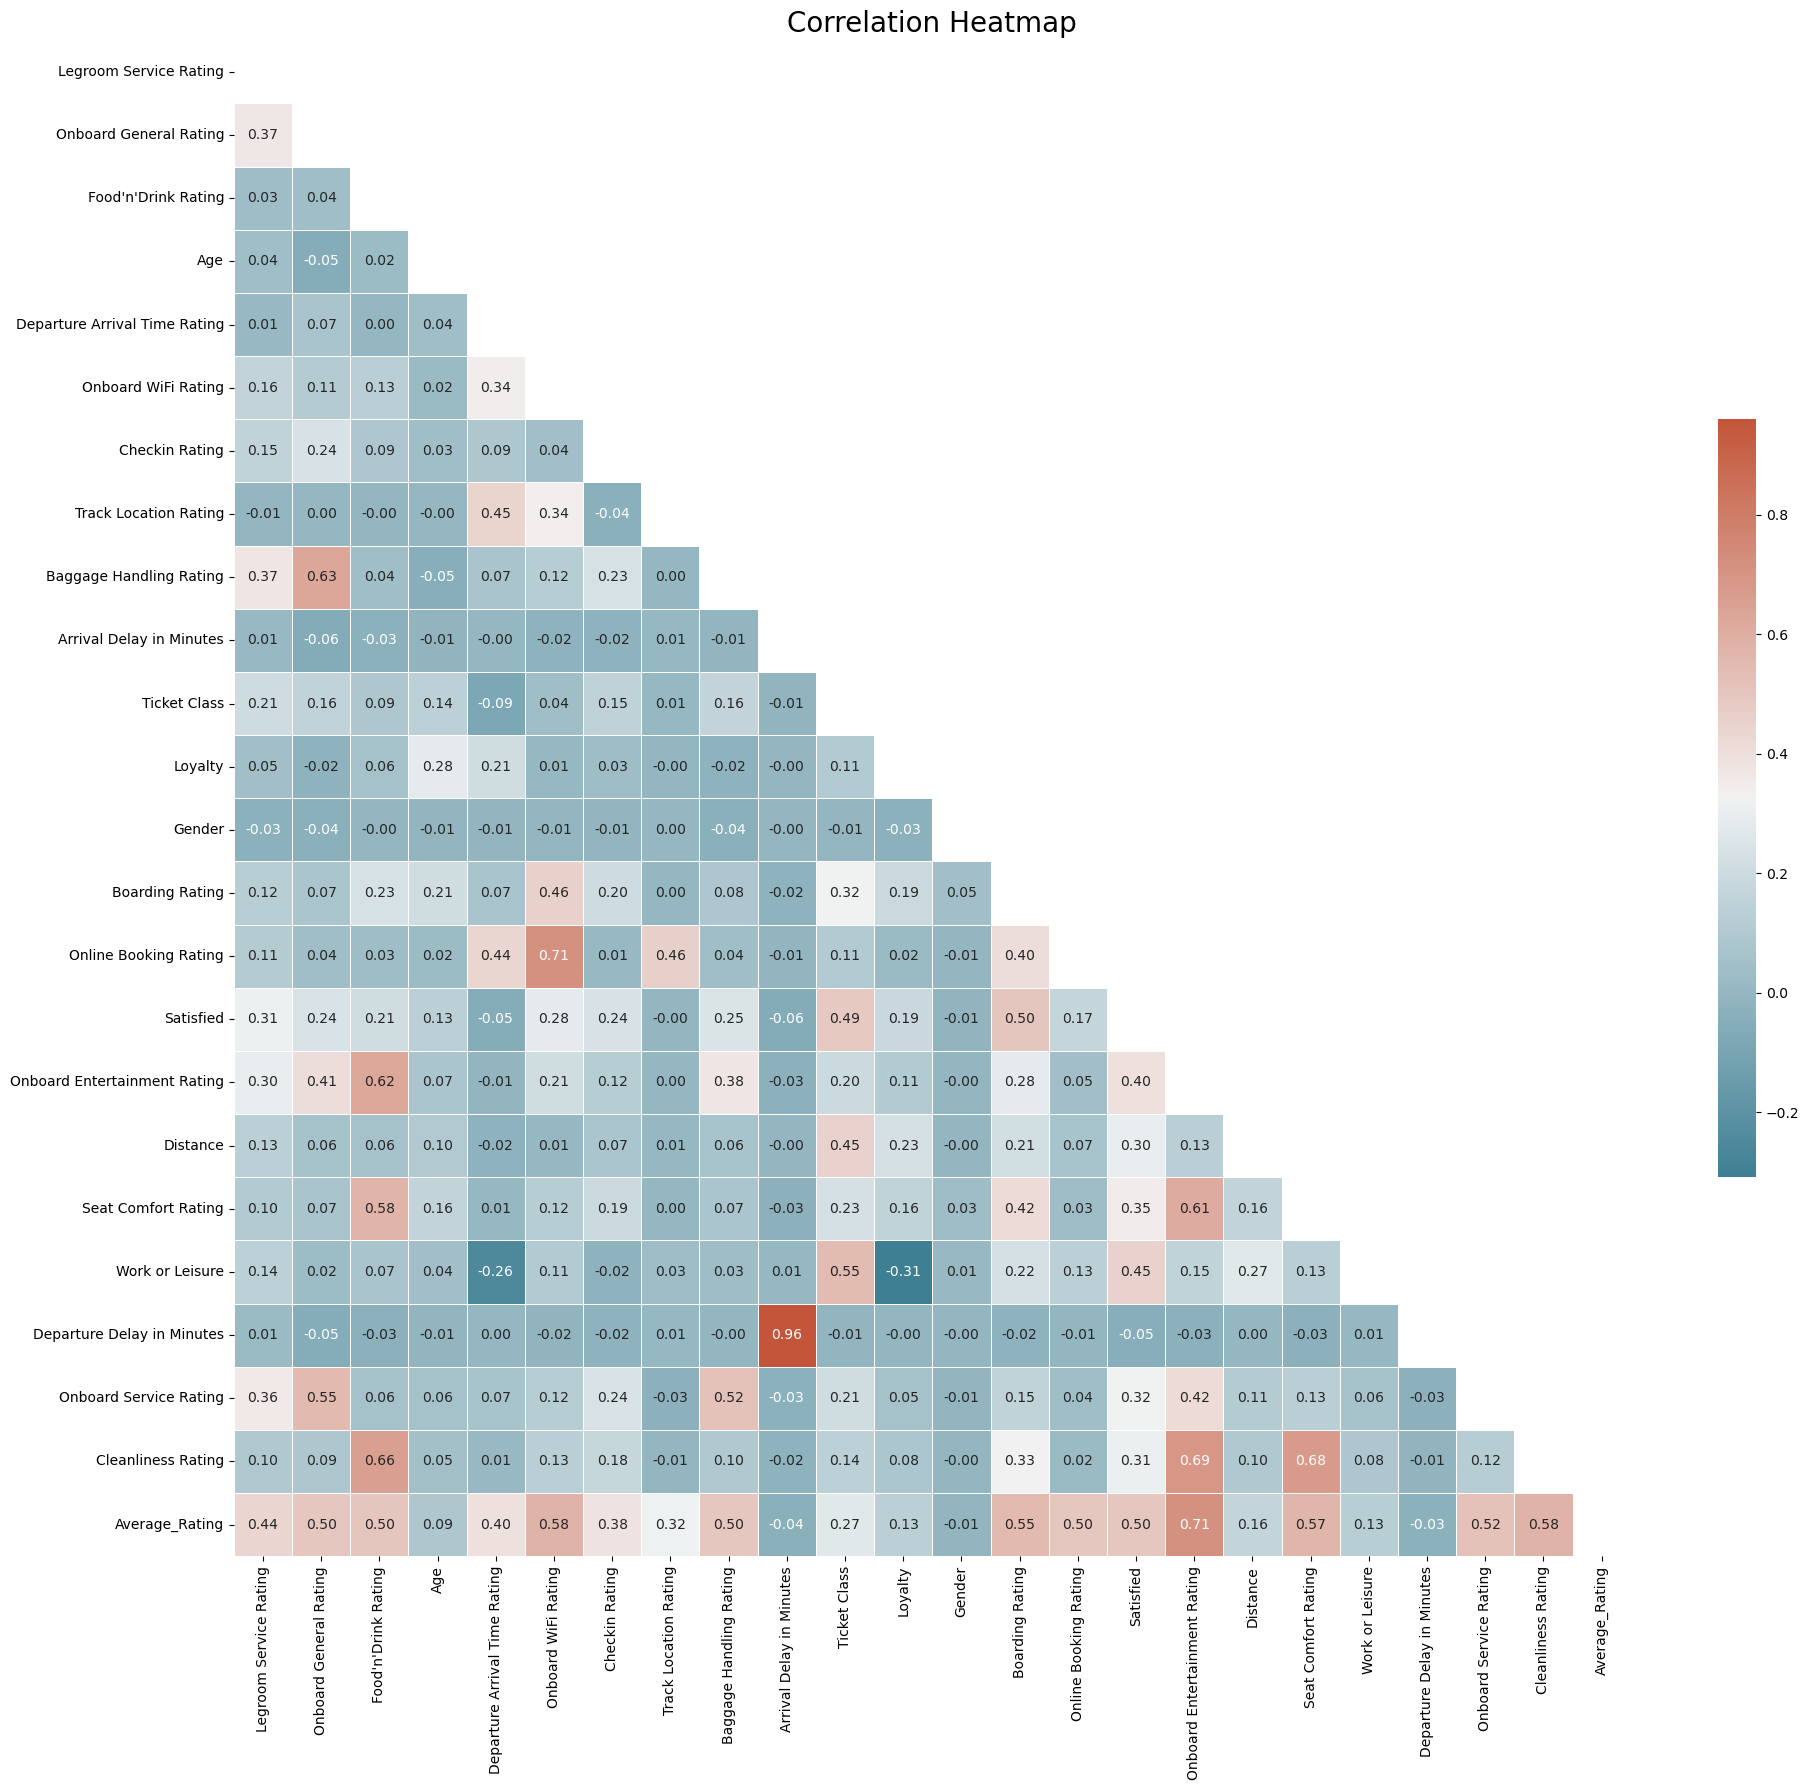

In [189]:
correlation_matrix =trains_df.corr()
plt.figure(figsize=(20, 18))  
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  

cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Generate a heatmap
ax = sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f",
                 linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Adjust y-axis labels
plt.title('Correlation Heatmap', fontsize=20)  # Add a title to the heatmap
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Now, we narrow our focus on to the Satisfied column to check how the ratings given by the individuals impact the customers' satisfaction (or the lack there of). The Average_Rating column gives a generalization.

In [190]:
trains_df.corr().Satisfied.sort_values()

Arrival Delay in Minutes        -0.058145
Departure Arrival Time Rating   -0.054270
Departure Delay in Minutes      -0.050740
Gender                          -0.011236
Track Location Rating           -0.002793
Age                              0.134091
Online Booking Rating            0.168877
Loyalty                          0.186017
Food'n'Drink Rating              0.211340
Checkin Rating                   0.237252
Onboard General Rating           0.244918
Baggage Handling Rating          0.248680
Onboard WiFi Rating              0.283460
Distance                         0.298085
Cleanliness Rating               0.307035
Legroom Service Rating           0.312424
Onboard Service Rating           0.322205
Seat Comfort Rating              0.348829
Onboard Entertainment Rating     0.398234
Work or Leisure                  0.449861
Ticket Class                     0.492947
Average_Rating                   0.495315
Boarding Rating                  0.501749
Satisfied                        1

We notice that there is a negative correlation in arrival/departure delay and the satisfaction. This is natural as passengers who waited longer (or arrived later) will have low satisfaction with the services. 

Further, we notice that all ratings have a positive correlation with the satisfaction and the newly added Average Rating has a sufficiently hight correlation of approximately 0.5. Thus, we can also notice that our interpretation of ratings as an average proved to be pretty useful. We recognise average rating (or the ratings in general) as a reliable judge of the satisfaction i.e. people who gave a higher rating were mostly satisfied with the services.

We deem a correlation lower than |0.15| as 'unimportant' for our analysis, as these variables hold minimum correlation with the satisfied column. Then, we drop these columns from our analysis

In [191]:
correlations = trains_df.corr()['Satisfied']
columns_to_drop = correlations[correlations.abs() < 0.15].index.tolist()
trains_df = trains_df.drop(columns=columns_to_drop)

In [192]:
trains_df.shape

(129880, 18)

In [193]:
trains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Legroom Service Rating        129880 non-null  int64  
 1   Onboard General Rating        129880 non-null  int64  
 2   Food'n'Drink Rating           129880 non-null  int64  
 3   Onboard WiFi Rating           129880 non-null  int64  
 4   Checkin Rating                129880 non-null  int64  
 5   Baggage Handling Rating       129880 non-null  int64  
 6   Ticket Class                  129880 non-null  int64  
 7   Loyalty                       129880 non-null  int64  
 8   Boarding Rating               129880 non-null  int64  
 9   Online Booking Rating         129880 non-null  int64  
 10  Satisfied                     129880 non-null  int64  
 11  Onboard Entertainment Rating  129880 non-null  int64  
 12  Distance                      129880 non-nul

Therefore, we now know that 26 attributes and 129880 entries (or rows). We also notice that all of the attributes are non-nulls. We mostly have integers (19), then object (5) and float values (2). We also notice that Satisfied is now integer as we previosly altered it. 

In [194]:
display(trains_df.describe())

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Onboard WiFi Rating,Checkin Rating,Baggage Handling Rating,Ticket Class,Loyalty,Boarding Rating,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Work or Leisure,Onboard Service Rating,Cleanliness Rating,Average_Rating
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.350878,3.642193,3.204774,2.728696,3.306267,3.632114,2.029650,0.816908,3.252633,2.756876,0.434463,3.358077,1190.316392,3.441361,0.690584,3.383023,3.286326,3.241267
std,1.316252,1.176669,1.329933,1.329340,1.266185,1.180025,0.962636,0.386743,1.350719,1.401740,0.495688,1.334049,997.452477,1.319289,0.462255,1.287099,1.313682,0.661728
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.071429
25%,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000,2.785714
50%,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1.000000,3.000000,3.000000,0.000000,4.000000,844.000000,4.000000,1.000000,4.000000,3.000000,3.285714
75%,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,1.000000,4.000000,4.000000,1.000000,4.000000,1744.000000,5.000000,1.000000,4.000000,4.000000,3.714286
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,5.000000,5.000000,1.000000,5.000000,4983.000000,5.000000,1.000000,5.000000,5.000000,5.000000


This information is very rigorous. Once again, lets try to narrow our focus down to the columns that truly matter when judging customer satisfaction: Satisfied and Average Rating.

In [195]:
trains_df.Satisfied.describe()

count    129880.000000
mean          0.434463
std           0.495688
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Satisfied, dtype: float64

In [196]:
trains_df.Average_Rating.describe()

count    129880.000000
mean          3.241267
std           0.661728
min           1.071429
25%           2.785714
50%           3.285714
75%           3.714286
max           5.000000
Name: Average_Rating, dtype: float64

To visalize these values better, lets put them in a Histogram.

<function matplotlib.pyplot.show(close=None, block=None)>

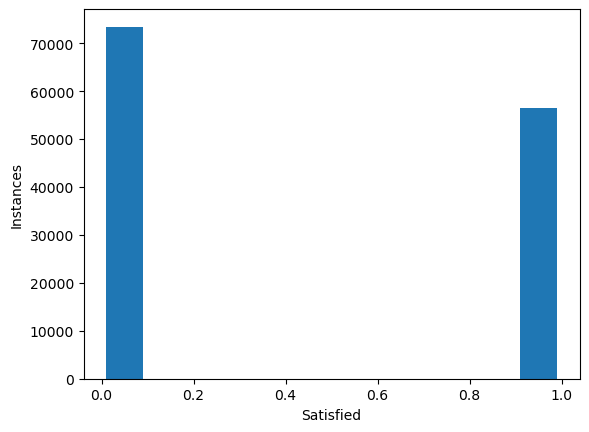

In [197]:
plt.hist(trains_df.Satisfied,rwidth=0.8)
plt.xlabel("Satisfied")
plt.ylabel("Instances")
plt.show

We notice that the average rating is a Normal Distribution. Therefore, our previous hypothesis might not be 100% accurate. (Average Rating is a fairly accurate measure of Customer Satisfaction). 

This shows that customers in general don't treat the 50% (or even 60%) of rating to be Satisfied. Lets analyse this further to determine what rating, on average means that the customer is Satisfied.

To determine what average rating typically indicates customer satisfaction, we can calculate the mean average rating for entries where "Satisfied" is equal to 1 (satisfied customers). This will give us an idea of the average rating that corresponds to customer satisfaction in the dataset.

In [198]:
average_rating_satisfied = trains_df[trains_df['Satisfied'] == 1]['Average_Rating'].mean()
print("Average Rating for Satisfied Customers:", average_rating_satisfied)

Average Rating for Satisfied Customers: 3.6152176224569263


This shows that the top 28% of the Average Ratings can be considered as suffiecient for the customer to be Satisfied. 

Lets further determine the percentage of satisfied customers based on the average rating, we can create a summary that shows the relationship between different average rating levels and customer satisfaction. We'll calculate the percentage of satisfied customers for each average rating value and then, visualise it graphically using a simple scatter plot.

    Average_Rating  Percentage_Satisfied  Number_of_Entries
0         1.071429            100.000000                  2
1         1.142857             25.000000                  4
2         1.214286             29.411765                 17
3         1.285714             50.000000                 18
4         1.357143             20.000000                 40
5         1.428571             25.000000                 84
6         1.500000             16.666667                108
7         1.571429             15.887850                214
8         1.642857             18.245614                285
9         1.714286             12.211982                434
10        1.785714             13.043478                529
11        1.857143             12.073864                704
12        1.928571             11.791908                865
13        2.000000             12.300885               1130
14        2.071429             12.401996               1403
15        2.142857             12.546354

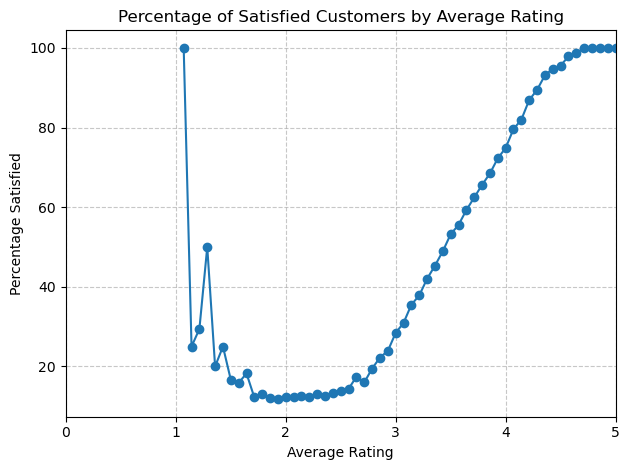

In [199]:
rating_satisfaction_summary = trains_df.groupby('Average_Rating').agg({'Satisfied': ['mean', 'count']}).reset_index()
rating_satisfaction_summary.columns = ['Average_Rating', 'Percentage_Satisfied', 'Number_of_Entries']
rating_satisfaction_summary['Percentage_Satisfied'] = rating_satisfaction_summary['Percentage_Satisfied'] * 100

print(rating_satisfaction_summary)

x = rating_satisfaction_summary['Average_Rating']
y = rating_satisfaction_summary['Percentage_Satisfied']

plt.plot(x, y, marker='o')
plt.xlabel('Average Rating')
plt.ylabel('Percentage Satisfied')
plt.title('Percentage of Satisfied Customers by Average Rating')
plt.grid(linestyle='--', alpha=0.7)
plt.xlim(0, 5) 
plt.tight_layout()

plt.show()

We notice that the graph follows an increasing pattern of positive correlation, i.e. the percentage of people who were satisfied increases with the Average Rating they give. For example, we can see that only around 12.2% of the customers who gave a rating of 2 (434 in total) on average were 'Satisfied' while 100% of the customers who gave a rating of 4.7 to 5 on average were 'Satisfied'.

However, we do notice that there are a few outliers, the most prominent 2 being those at Average Rating of 1.07, both of which (100%) were 'Satisfied'.

Now, let's analyse each of these outliers.

Outliers:
   Average_Rating  Percentage_Satisfied  Number_of_Entries
0        1.071429                 100.0                  2


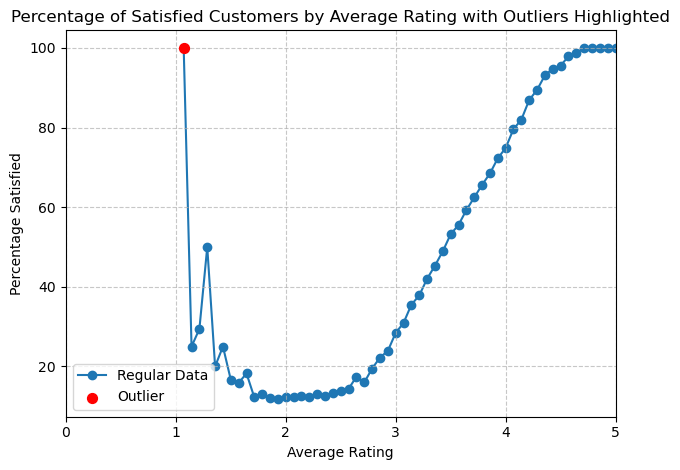

In [200]:
criterion = (rating_satisfaction_summary['Average_Rating'] < 2) & (rating_satisfaction_summary['Percentage_Satisfied'] == 100)

# Isolating outliers
outlier_data = rating_satisfaction_summary[criterion]

# Analyzing Outliers - You might want to look at different aspects of these outliers
# For demonstration, let's just print these outliers
print("Outliers:")
print(outlier_data)

# Additionally, you might want to plot these outliers in a different color on the same graph
plt.plot(rating_satisfaction_summary['Average_Rating'], rating_satisfaction_summary['Percentage_Satisfied'], marker='o', zorder= 1, label="Regular Data")
plt.scatter(outlier_data['Average_Rating'], outlier_data['Percentage_Satisfied'], color='red', s=50, zorder=2, label="Outlier") 
plt.xlabel('Average Rating')
plt.ylabel('Percentage Satisfied')
plt.title('Percentage of Satisfied Customers by Average Rating with Outliers Highlighted')
plt.grid(linestyle='--', alpha=0.7)
plt.xlim(0, 5)
plt.legend()
plt.tight_layout()
plt.show()

**Remove Outliers**

We choose to remove these outliers as there is little justification to why someone who gives a rating of as low as 1.07 would be 'Satisfied' in general.

In [201]:
rating_to_remove = 1.071429
# Using a tolerance for floating point comparison
tolerance = 0.001

# Filter out the rows where Average_Rating is approximately equal to rating_to_remove
trains_df = trains_df[~(trains_df['Average_Rating'].between(rating_to_remove - tolerance, rating_to_remove + tolerance))]

Now, we have preprocessed the data. We dealt with missing value, encoded categorical features and removed outliers. Let's visualise this data to really see how the visualisations have changed.

The Visualisations in question are the scatter plot for average rating, the correlation heatmap without the insignificant column variables, and the density plot of categorical variables still deemed as important.

    Average_Rating  Percentage_Satisfied  Number_of_Entries
0         1.142857             25.000000                  4
1         1.214286             29.411765                 17
2         1.285714             50.000000                 18
3         1.357143             20.000000                 40
4         1.428571             25.000000                 84
5         1.500000             16.666667                108
6         1.571429             15.887850                214
7         1.642857             18.245614                285
8         1.714286             12.211982                434
9         1.785714             13.043478                529
10        1.857143             12.073864                704
11        1.928571             11.791908                865
12        2.000000             12.300885               1130
13        2.071429             12.401996               1403
14        2.142857             12.546354               1618
15        2.214286             12.379503

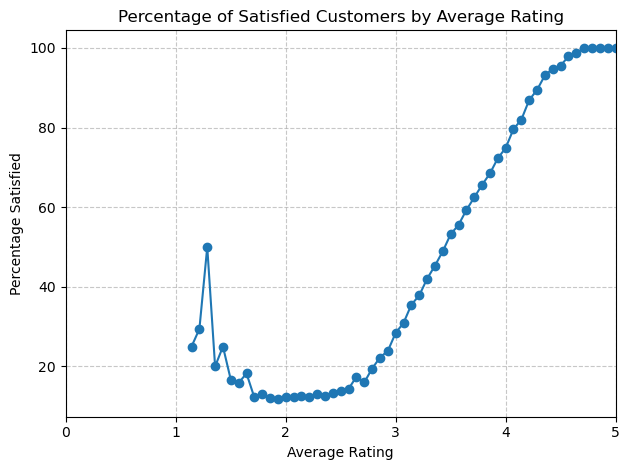

In [202]:
rating_satisfaction_summary = trains_df.groupby('Average_Rating').agg({'Satisfied': ['mean', 'count']}).reset_index()
rating_satisfaction_summary.columns = ['Average_Rating', 'Percentage_Satisfied', 'Number_of_Entries']
rating_satisfaction_summary['Percentage_Satisfied'] = rating_satisfaction_summary['Percentage_Satisfied'] * 100

print(rating_satisfaction_summary)

x = rating_satisfaction_summary['Average_Rating']
y = rating_satisfaction_summary['Percentage_Satisfied']

plt.plot(x, y, marker='o')
plt.xlabel('Average Rating')
plt.ylabel('Percentage Satisfied')
plt.title('Percentage of Satisfied Customers by Average Rating')
plt.grid(linestyle='--', alpha=0.7)
plt.xlim(0, 5) 
plt.tight_layout()

plt.show()

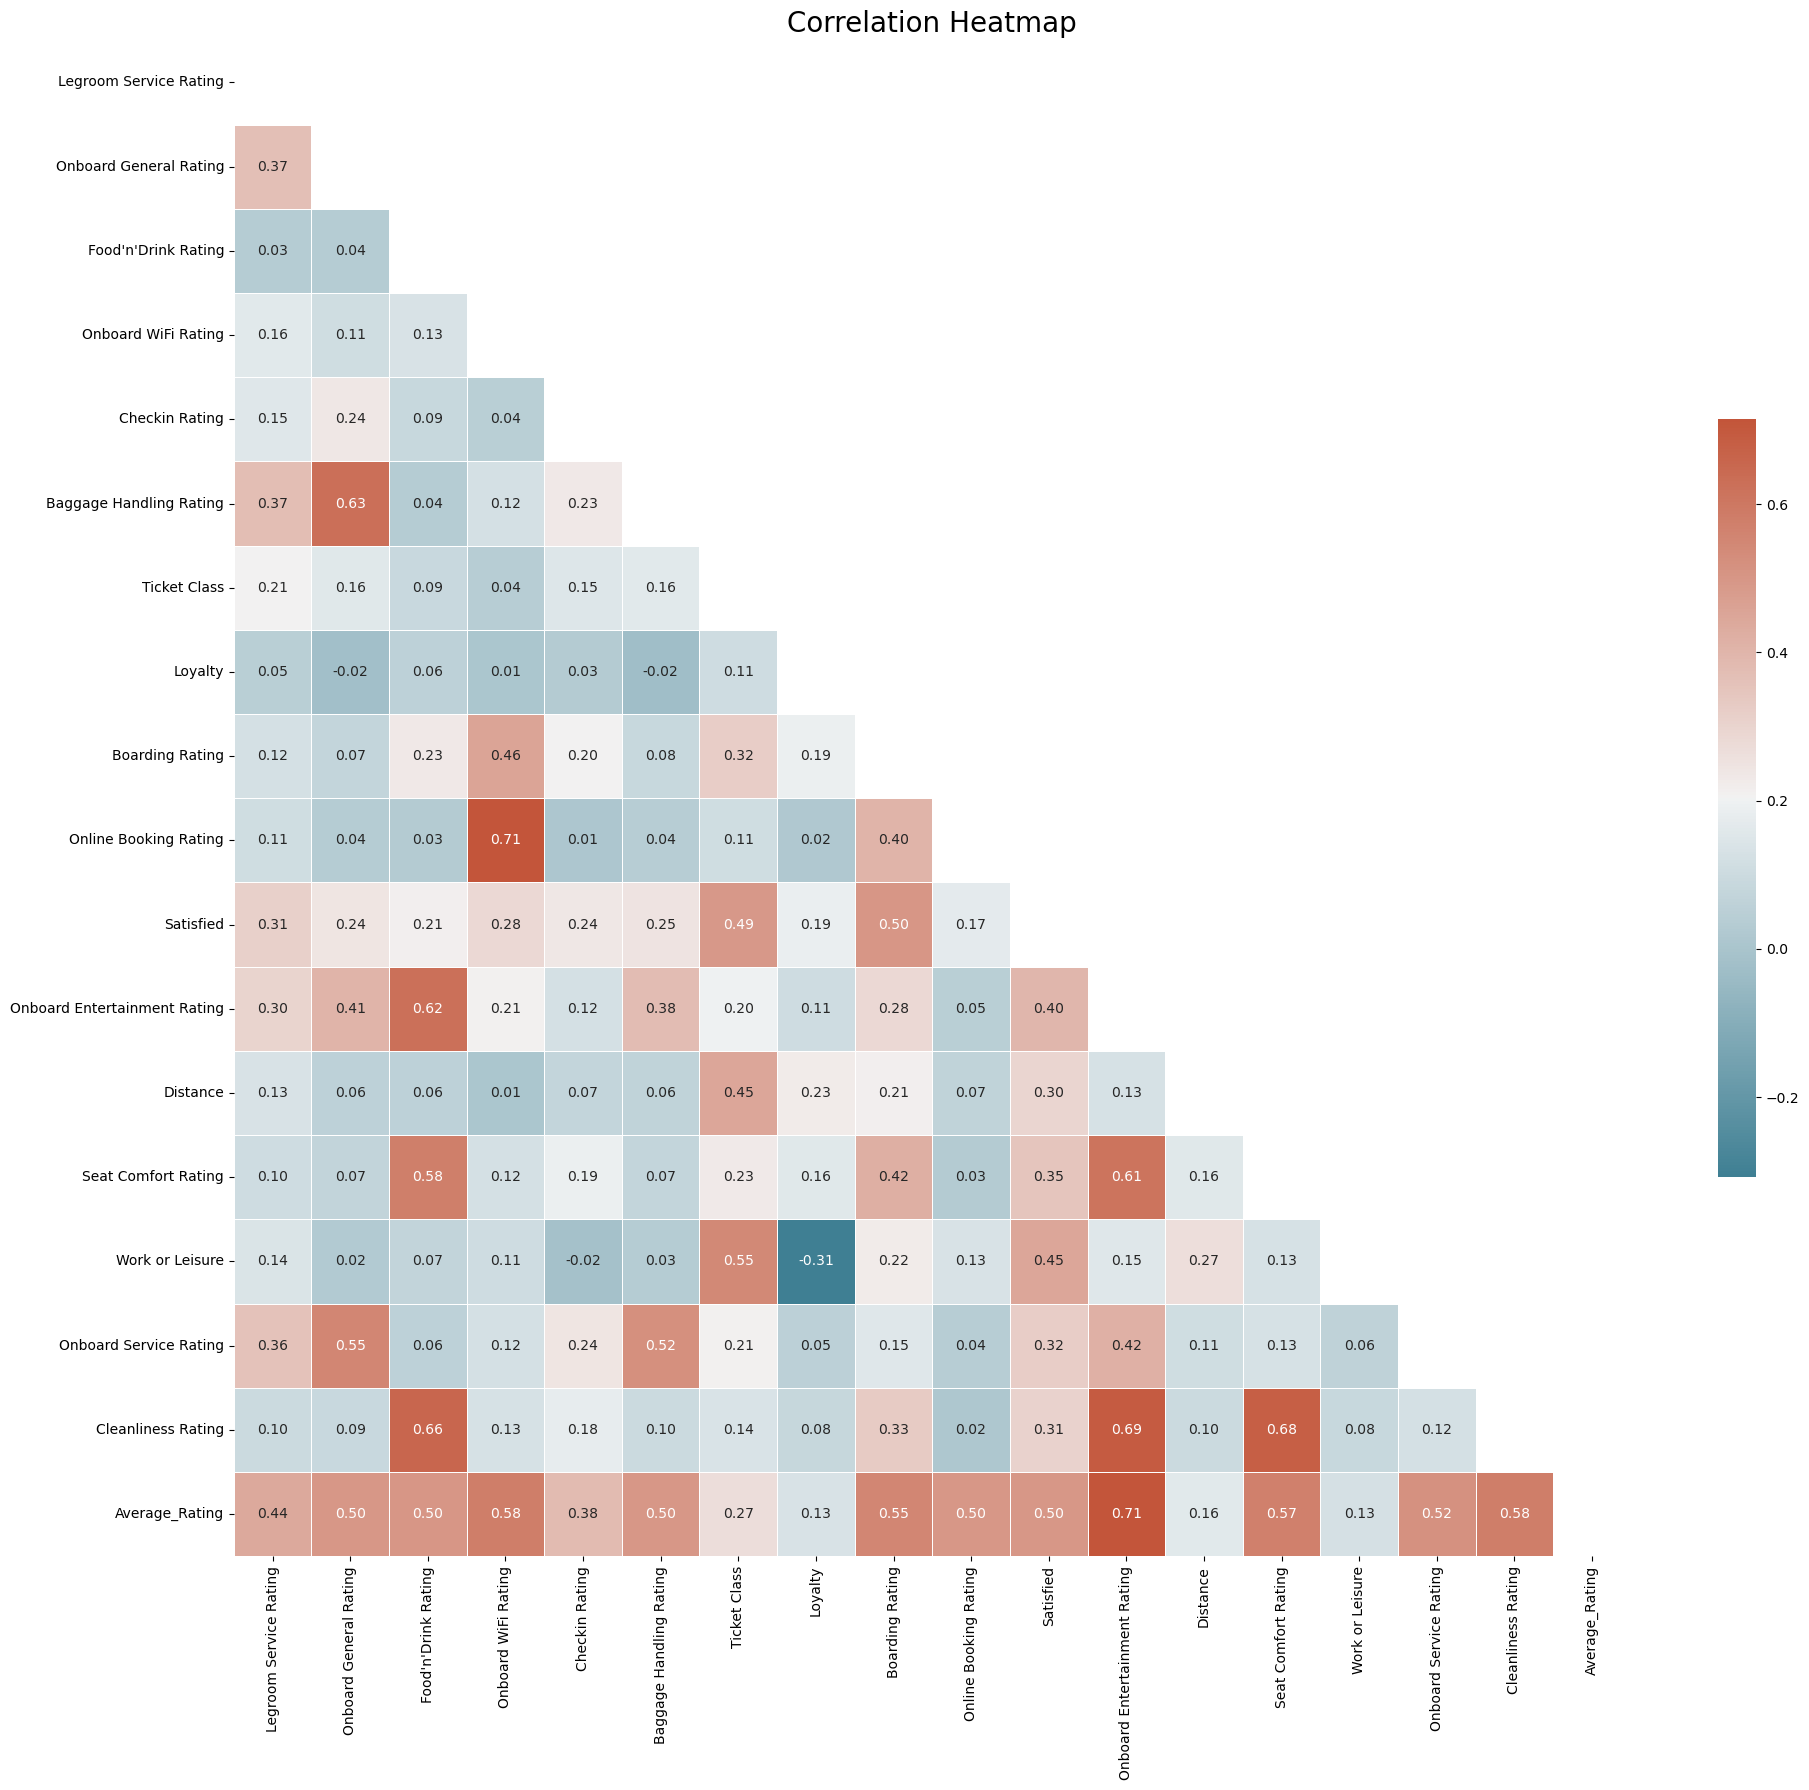

In [203]:
correlation_matrix =trains_df.corr()
plt.figure(figsize=(20, 18))  
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  

cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Generate a heatmap
ax = sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f",
                 linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Adjust y-axis labels
plt.title('Correlation Heatmap', fontsize=20)  # Add a title to the heatmap
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

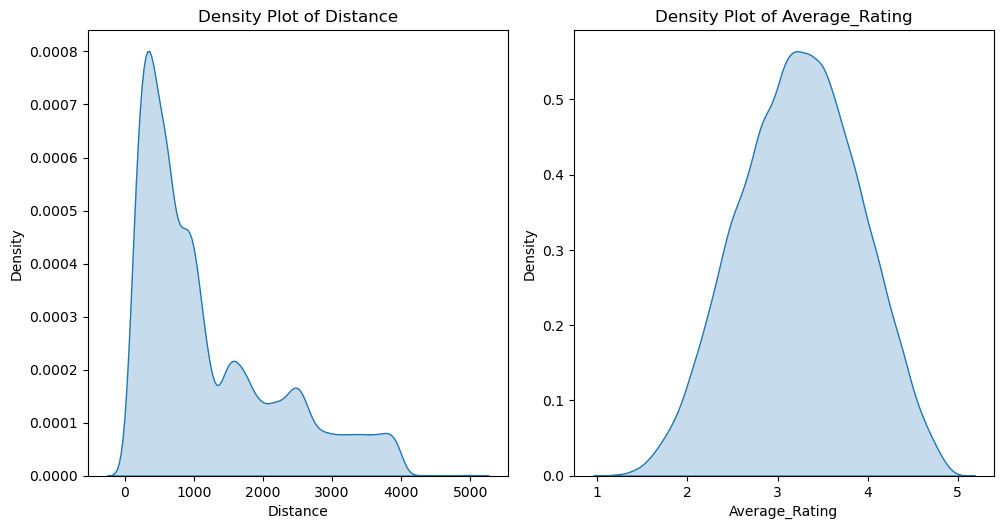

In [204]:
continuous_variables = [ 'Distance', 'Average_Rating']

# Generating density plots for each continuous variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 3, i)  # Adjust the grid dimensions as needed
    sns.kdeplot(trains_df[var], shade=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Now, we can conclude that the data is officially ready for modelling.

**Generate a Training and Test Set**

In [205]:
X = trains_df.drop('Satisfied', axis=1)  # Features (all columns except for the target variable)
y = trains_df['Satisfied']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) 

After the split, X_train and y_train contain the features and target variable for the training set, respectively. Similarly, X_test and y_test contain the features and target variable for the test set. 

Now, let's look at the purpose of our analysis once again: '...to understand the satisfaction of the customers even without a direct evaluation'. Our goal here is to predict customer satisfaction using other features as inputs, in which case this would become a supervised learning problem, specifically a **classification problem**. This is because we are dealing with customer satisfaction that is classified into discrete binary classes of Y and N (Yes and No, 1 and 0)

In [206]:
X_train.shape

(103902, 17)

In [207]:
X_test.shape

(25976, 17)

**Scaling**

We have a dataset where the categorical variables are appropriately dealt with through encoding. Therefore, our data is ready for scaling.

In [208]:
scaler = StandardScaler()
print(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

        Legroom Service Rating  Onboard General Rating  Food'n'Drink Rating  \
51186                        5                       4                    2   
58839                        3                       3                    3   
55058                        5                       3                    5   
90911                        4                       3                    3   
89530                        5                       2                    1   
...                        ...                     ...                  ...   
104005                       2                       5                    2   
10742                        2                       2                    2   
49690                        4                       4                    2   
58565                        5                       5                    4   
61616                        5                       5                    2   

        Onboard WiFi Rating  Checkin Rating  Baggag

Let's test out a few models. To start, let's make our validation test.

**Logistic Regression**

We use logistic regression as a possible model because we are dealing with a binary target variable. Further, logistic models are highly interpretable as we can easily understand the impact of each feature on the odds of the target variable. Additionally, logistic regression can perform quite well on binary classification tasks and is a good baseline model for binary classification problems whilst providing a simplistic model. 

Testing with Default Hyperparameters

In [209]:
model_reg = LogisticRegression()
model_reg.fit(X_train, y_train)

y_pred_mr = model_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_mr)
precision = precision_score(y_test, y_pred_mr)
recall = recall_score(y_test, y_pred_mr)
f1 = f1_score(y_test, y_pred_mr)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8728441638435479
Precision: 0.8675151071232375
Recall: 0.8362015709116583
F1 Score: 0.8515705747539658


10 Fold Cross Validation for Hyperparameters (with GridSearchCV)

In [210]:
# Initialize the Logistic Regression model
model_reg = LogisticRegression()

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']  # Optimization algorithms
}

grid_search = GridSearchCV(model_reg, param_grid, cv=10, scoring="recall", verbose=0) 
grid_search.fit(X_train, y_train)


/Users/janvigoje/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/janvigoje/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/janvigoje/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/janvigoje/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/janvigoje/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/janvigoje/opt/anaconda3

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='recall')

Finding the Best Parameter

In [211]:
grid_search.best_params_

{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}

**Decision Trees**

We next experiment with decision trees. Decision trees are extremely versatile models as they can handle various kinds of data, including the categorical data we are dealing with in this project. 

In [212]:
model_dt = DecisionTreeClassifier()

# Fit the model to the training data
model_dt.fit(X_train, y_train)

# Predict on the validation set
y_pred_dt = model_dt.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary') 
recall_dt = recall_score(y_test, y_pred_dt, average='binary') 
f1_dt = f1_score(y_test, y_pred_dt, average='binary')  

# Print the metrics
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.944371727748691
Precision: 0.9335204350114015
Recall: 0.939369870267408
F1 Score: 0.9364360181234329


10 Fold Cross Validation for Hyperparameters (with RandomizedSearchCV)

Since the number of hyperparameters to test is large, we decide to use RandomizedSearchCV. This will test the model with a certain number of combinations (75% of possible combinations in our case) of the hyperparameters and return the best model out of them. The advantage of using this over GridSearchCV is that it is faster than using GridSearchCV but less precise since this latter tests all the possible combinations of hyperparameters.

In [213]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

random_search = RandomizedSearchCV(model_dt, param_grid, n_iter=100, cv=10, scoring="recall", verbose=0)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

Finding the Best Parameter

In [214]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

**Random Forests**

A random forest is a more powerful ensemble method that uses multiple decision trees. A key aspect of of Random Forests that is particularly helpful for our dataset is that it works really well with large datasets (like the one we are dealing with). Further, its accuracy is fairly good as well.

In [215]:
model_rf = RandomForestClassifier()

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  # Adjust average for multi-class
recall_rf = recall_score(y_test, y_pred_rf, average='binary')  # Adjust average for multi-class
f1_rf = f1_score(y_test, y_pred_rf, average='binary')  # Adjust average for multi-class

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

Accuracy:  0.9627733292269788
Precision:  0.9717771303714494
Recall:  0.9420174741858618
F1 Score:  0.9566659197848981


10 Fold Cross Validation for Hyperparameters (with GridSearchCV)

In [216]:
param_grid = {
    'n_estimators': [100, 250, 500],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(model_rf, param_grid, cv=10, scoring="recall", verbose=0) 
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500]},
             scoring='recall')

Finding the Best Parameter

In [217]:
grid_search.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 250}

In [218]:
d = {}
d['Logistic Regression'] = [accuracy, precision, recall, f1]
d['Decision Trees'] = [accuracy_dt, precision_dt, recall_dt, f1_dt]
d['Random Forest'] = [accuracy_rf, precision_rf, recall_rf, f1_rf]

# Round the values for better readability
for model in d:
    d[model] = [round(metric, 2) for metric in d[model]]

# Create DataFrame from the dictionary
dff = pd.DataFrame.from_dict(d, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
print(dff)

                     Accuracy  Precision  Recall  F1 Score
Logistic Regression      0.87       0.87    0.84      0.85
Decision Trees           0.94       0.93    0.94      0.94
Random Forest            0.96       0.97    0.94      0.96


**Computing Performance of the Test Set with Random Forests**

In [219]:
model = model_rf
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9622343701878657
Precision: 0.9718271334792122
Recall: 0.9406936722266349
F1 Score: 0.9560069958294094


We notice that for all the metrics, including Recall, our model of Random Forests performs really well on the test set we formerly initialised with excellent scores of above 0.9. 

Therefore, we can conclude that our model is a good model.